In [2]:
import re
import requests
from bs4 import BeautifulSoup

from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
url = "https://www.transfermarkt.com/fc-arsenal/startseite/verein/11"
player_id = url.split('/')[-1]

In [4]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36 Edg/120.0.0.0"
}

In [5]:
response = requests.get(url, headers=headers)

In [6]:
soup = BeautifulSoup(response.content, "html.parser")

In [7]:
table = soup.select('table[class="items"]')[0].text.split('\n')

In [16]:
for i, row in enumerate(table):
    if row == '' or row == ' ':
        table.pop(i)
    row.replace(' ', '')

table

['#PlayerDate of birth/AgeNat.Market value',
 '22',
 '                David Raya            ',
 '            Goalkeeper        ',
 'Sep 15, 1995 (28)€35.00m',
 '1',
 '                Aaron Ramsdale            ',
 '            Goalkeeper        ',
 'May 14, 1998 (25)€28.00m',
 '31',
 '                Karl Hein            ',
 '            Goalkeeper        ',
 'Apr 13, 2002 (21)€2.00m',
 '2',
 '                William Saliba            ',
 '            Centre-Back        ',
 'Mar 24, 2001 (22)€75.00m',
 '6',
 '                Gabriel Magalhães            ',
 '            Centre-Back        ',
 'Dec 19, 1997 (26)€60.00m',
 '12',
 '                Jurrien Timber            ',
 '            Centre-Back        ',
 'Jun 17, 2001 (22)€40.00m',
 '15',
 '                Jakub Kiwior            ',
 '            Centre-Back        ',
 'Feb 15, 2000 (23)€25.00m',
 '35',
 '                Oleksandr Zinchenko            ',
 '            Left-Back        ',
 'Dec 15, 1996 (27)€42.00m',
 '4',
 '       

In [14]:
for i, row in enumerate(table):
    if row == ' ':
        table.pop(i)
    row.strip(' ')

col_heads = table[0] 

col_heads

'#PlayerDate of birth/AgeNat.Market value'

In [18]:
squad_df = table[1:]

In [19]:
squad_df

['22',
 '                David Raya            ',
 '            Goalkeeper        ',
 'Sep 15, 1995 (28)€35.00m',
 '1',
 '                Aaron Ramsdale            ',
 '            Goalkeeper        ',
 'May 14, 1998 (25)€28.00m',
 '31',
 '                Karl Hein            ',
 '            Goalkeeper        ',
 'Apr 13, 2002 (21)€2.00m',
 '2',
 '                William Saliba            ',
 '            Centre-Back        ',
 'Mar 24, 2001 (22)€75.00m',
 '6',
 '                Gabriel Magalhães            ',
 '            Centre-Back        ',
 'Dec 19, 1997 (26)€60.00m',
 '12',
 '                Jurrien Timber            ',
 '            Centre-Back        ',
 'Jun 17, 2001 (22)€40.00m',
 '15',
 '                Jakub Kiwior            ',
 '            Centre-Back        ',
 'Feb 15, 2000 (23)€25.00m',
 '35',
 '                Oleksandr Zinchenko            ',
 '            Left-Back        ',
 'Dec 15, 1996 (27)€42.00m',
 '4',
 '                Ben White            ',
 '          

In [20]:
squad_dict = {
    'number': [],
    'name': [],
    'pos': [],
    'age': [],
    'mv': []
}

for i in range(0, len(squad_df), 4):
    squad_dict['number'].append(squad_df[i])

for i in range(1, len(squad_df), 4):
    squad_dict['name'].append(squad_df[i])

for i in range(2, len(squad_df), 4):
    squad_dict['pos'].append(squad_df[i])

for i in range(3, len(squad_df), 4):
    squad_dict['age'].append(squad_df[i])        

# squad_dict['dob(age)/mv']

for i, item in enumerate(squad_dict['age']):
    squad_dict['mv'].append(item[item.find("€"):])
    squad_dict['age'][i] = item[item.find("(")+1:item.find(")")]

sq_df = pd.DataFrame(data=squad_dict)

sq_df

,number,name,pos,age,mv
0,22,David Raya,Goalkeeper,28,€35.00m
1,1,Aaron Ramsdale,Goalkeeper,25,€28.00m
2,31,Karl Hein,Goalkeeper,21,€2.00m
3,2,William Saliba,Centre-Back,22,€75.00m
4,6,Gabriel Magalhães,Centre-Back,26,€60.00m
5,12,Jurrien Timber,Centre-Back,22,€40.00m
6,15,Jakub Kiwior,Centre-Back,23,€25.00m
7,35,Oleksandr Zinchenko,Left-Back,27,€42.00m
8,4,Ben White,Right-Back,26,€55.00m
9,18,Takehiro Tomiyasu,Right-Back,25,€30.00m


In [22]:
sq_df['name'] = sq_df['name'].apply(lambda x: x.strip())
sq_df['pos'] = sq_df['pos'].apply(lambda x: x.strip())
sq_df['number'] = sq_df['number'].apply(lambda x: x.strip())
sq_df['age'] = sq_df['age'].apply(lambda x: x.strip())
sq_df['mv'] = sq_df['mv'].apply(lambda x: x.strip())

sq_df

,number,name,pos,age,mv
0,22,David Raya,Goalkeeper,28,€35.00m
1,1,Aaron Ramsdale,Goalkeeper,25,€28.00m
2,31,Karl Hein,Goalkeeper,21,€2.00m
3,2,William Saliba,Centre-Back,22,€75.00m
4,6,Gabriel Magalhães,Centre-Back,26,€60.00m
5,12,Jurrien Timber,Centre-Back,22,€40.00m
6,15,Jakub Kiwior,Centre-Back,23,€25.00m
7,35,Oleksandr Zinchenko,Left-Back,27,€42.00m
8,4,Ben White,Right-Back,26,€55.00m
9,18,Takehiro Tomiyasu,Right-Back,25,€30.00m


In [1]:
squad_df

NameError: name 'squad_df' is not defined

In [350]:
def squad_distribution(df):
    plt.hist(df['pos'], bins=len(df['pos'].unique()), edgecolor='black', align='left', width=0.4)

    # Adding labels and title
    plt.xlabel('Position')
    plt.ylabel('Frequency')
    plt.title('Squad Position Distribution')

    # Customize yticks (positions of ticks on the y-axis)
    plt.yticks(range(0, 7))  # You can customize the range as needed

    # Display the histogram
    plt.show()

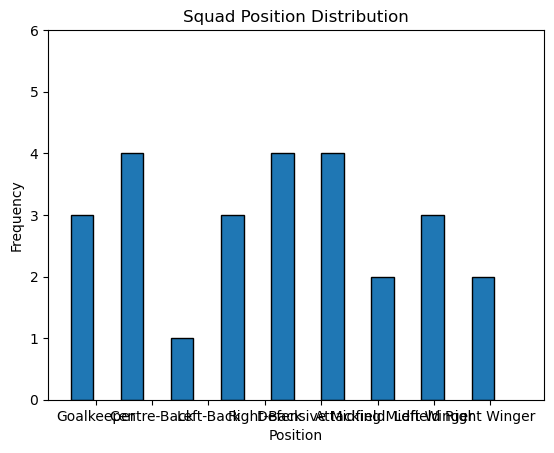

In [351]:
squad_distribution(sq_df)